## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()

In [25]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

## Read & parse data

In [2]:
dataset = pd.read_csv("./financial_data.csv")

## Exploring data

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [14]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [15]:
independent = dataset.drop(columns='e_signed')

<Axes: title={'center': 'Correlation with e_signed'}>

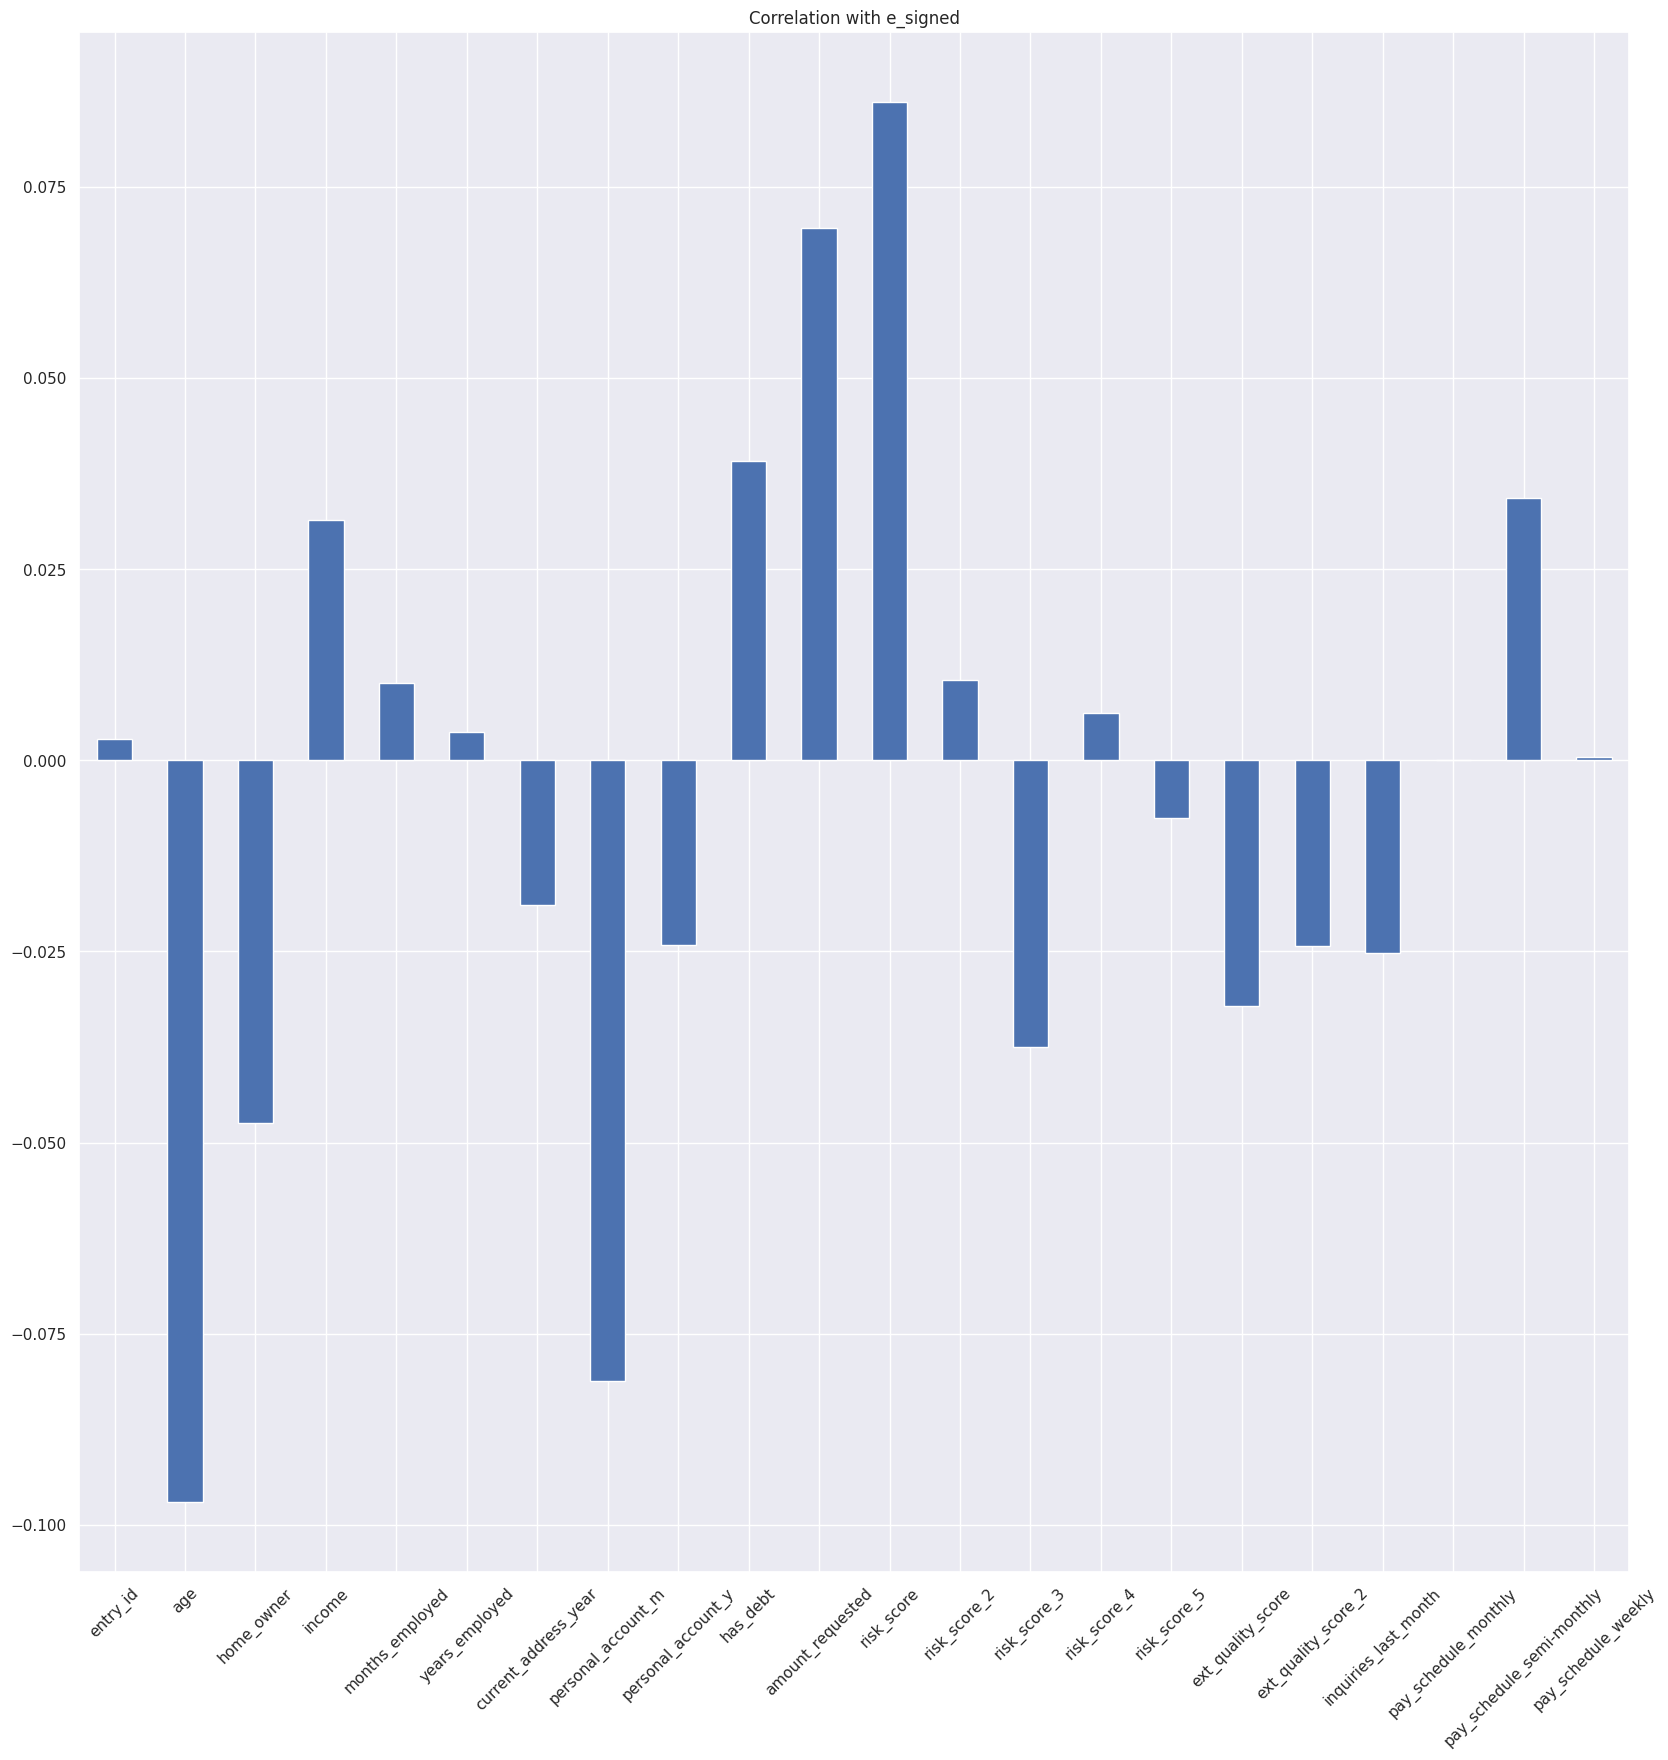

In [18]:
independent.corrwith(dataset['e_signed']).plot.bar(
    title='Correlation with e_signed',
    figsize=(20, 20),
    rot=45,
    grid=True)

In [10]:
null_percent = dataset.isnull().sum() / dataset.shape[0] * 100
null_percent

entry_id                0.0
age                     0.0
pay_schedule            0.0
home_owner              0.0
income                  0.0
months_employed         0.0
years_employed          0.0
current_address_year    0.0
personal_account_m      0.0
personal_account_y      0.0
has_debt                0.0
amount_requested        0.0
risk_score              0.0
risk_score_2            0.0
risk_score_3            0.0
risk_score_4            0.0
risk_score_5            0.0
ext_quality_score       0.0
ext_quality_score_2     0.0
inquiries_last_month    0.0
e_signed                0.0
dtype: float64

In [11]:
dataset['pay_schedule'].unique()

array(['bi-weekly', 'weekly', 'semi-monthly', 'monthly'], dtype=object)

In [21]:
x = dataset.drop(['e_signed', 'entry_id'], axis=1)

In [20]:
y = dataset['e_signed']

## Split the dataset

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## feature scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [29]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, pre, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.575935,0.589621,0.700518,0.640303


## Support Vector Machine

In [30]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [31]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)

res = pd.DataFrame([['Support Vector Machine', acc, pre, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = pd.concat([results, res], ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.575935,0.589621,0.700518,0.640303
1,Support Vector Machine,0.615299,0.624774,0.716062,0.667310


## Random Forests

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [34]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)

res = pd.DataFrame([['Random Forests', acc, pre, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = pd.concat([results, res], ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.575935,0.589621,0.700518,0.640303
1,Support Vector Machine,0.615299,0.624774,0.716062,0.667310
2,Support Vector Machine,0.630932,0.646577,0.694819,0.669830
3,Random Forests,0.630932,0.646577,0.694819,0.669830
